<a href="https://colab.research.google.com/github/habibarezq/ML-Assignments-25/blob/main/Assignment-2/notebooks/comprehensive_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Part C — Comprehensive Analysis



In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import random
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import os , sys
## uncomment this if you are running on vs code
# sys.path.append(os.path.abspath("../"))
# from src.logisitc_manual import LogisticRegression
# from src.softmax_manual import SoftmaxRegression
# from src.nn_manual import *
# from src.data_preprocessing import *


# For reproducibility
SEED = 42
torch.manual_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

In [2]:
# comment if you are on vs code
from google.colab import files
uploaded = files.upload()
from logisitc_manual import LogisticRegression
from softmax_manual import SoftmaxRegression
from data_preprocessing import *
from nn_manual import *

Saving data_preprocessing.py to data_preprocessing.py
Saving logisitc_manual.py to logisitc_manual.py
Saving nn_manual.py to nn_manual.py
Saving softmax_manual.py to softmax_manual.py


# Data Loading and Preprocessing

### For Logisitc Regression (Class 0 vs 1)

In [3]:
binary_data = MNISTDataLoader(batch_size=32, binary=True, digits=(0, 1))
train_loader_bin, val_loader_bin, test_loader_bin = binary_data.get_loaders()

100%|██████████| 9.91M/9.91M [00:01<00:00, 6.06MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 160kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.52MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 10.7MB/s]


## For Softmax Regression and NN

In [4]:
multi_data = MNISTDataLoader(batch_size=32, binary=False)
train_loader, val_loader, test_loader = multi_data.get_loaders()

## C1 — Hyperparameter Analysis

### C1.1 Learning Rate Analysis



=== LR = 0.001 ===
Epoch 1/20 Train Loss: 1.9895 Train Acc: 0.3966 Val Loss: 1.6273 Val Acc: 0.6332
Epoch 2/20 Train Loss: 1.2881 Train Acc: 0.7206 Val Loss: 1.0034 Val Acc: 0.7883
Epoch 3/20 Train Loss: 0.8453 Train Acc: 0.8091 Val Loss: 0.7190 Val Acc: 0.8302
Epoch 4/20 Train Loss: 0.6492 Train Acc: 0.8409 Val Loss: 0.5865 Val Acc: 0.8540
Epoch 5/20 Train Loss: 0.5487 Train Acc: 0.8600 Val Loss: 0.5111 Val Acc: 0.8673
Epoch 6/20 Train Loss: 0.4875 Train Acc: 0.8716 Val Loss: 0.4625 Val Acc: 0.8787
Epoch 7/20 Train Loss: 0.4460 Train Acc: 0.8808 Val Loss: 0.4296 Val Acc: 0.8851
Epoch 8/20 Train Loss: 0.4159 Train Acc: 0.8879 Val Loss: 0.4031 Val Acc: 0.8918
Epoch 9/20 Train Loss: 0.3929 Train Acc: 0.8928 Val Loss: 0.3826 Val Acc: 0.8953
Epoch 10/20 Train Loss: 0.3747 Train Acc: 0.8972 Val Loss: 0.3671 Val Acc: 0.8995
Epoch 11/20 Train Loss: 0.3596 Train Acc: 0.9008 Val Loss: 0.3539 Val Acc: 0.9017
Epoch 12/20 Train Loss: 0.3469 Train Acc: 0.9035 Val Loss: 0.3420 Val Acc: 0.9037
Epoch

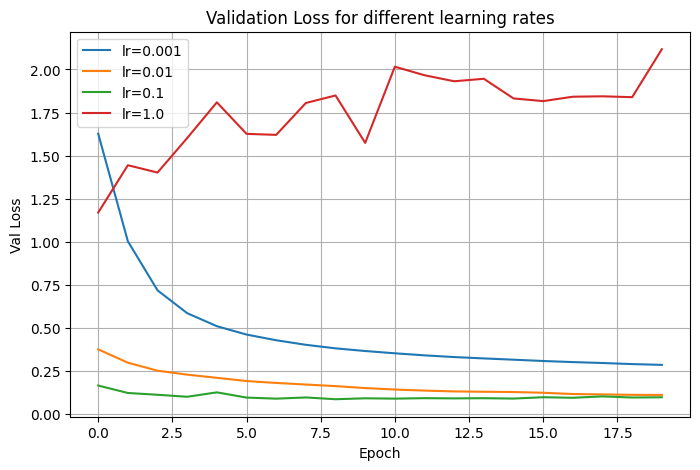

,lr,final_val_acc
0,0.001,0.918857
1,0.010,0.965714
2,0.100,0.978000
3,1.000,0.183357


In [5]:
learning_rates = [0.001, 0.01, 0.1, 1.0]
num_epochs = 20
batch_size = 64
results_lr = []
for lr in learning_rates:
    print(f"\n=== LR = {lr} ===")
    model = CustomFeedforwardNN()
    tl, vl, ta, va, _ = train_model_once(model, train_loader, val_loader, epochs=num_epochs, learning_rate=lr)
    results_lr.append({'lr': lr, 'train_losses': tl, 'val_losses': vl, 'train_acc': ta, 'val_acc': va})


# Plot validation loss comparison
plt.figure(figsize=(8,5))
for res in results_lr:
    plt.plot(res['val_losses'], label=f"lr={res['lr']}")
plt.xlabel('Epoch'); plt.ylabel('Val Loss'); plt.title('Validation Loss for different learning rates'); plt.legend(); plt.grid(True); plt.show()

# Summarize final val accuracy
pd.DataFrame([{'lr': r['lr'], 'final_val_acc': r['val_acc'][-1]} for r in results_lr])


### C1.2 Batch Size Analysis



=== Batch size = 16 ===
Epoch 1/5 Train Loss: 0.7588 Train Acc: 0.8030 Val Loss: 0.3768 Val Acc: 0.8924Grad Noise: 0.000031 Norm: 1.8214
Epoch 2/5 Train Loss: 0.3302 Train Acc: 0.9059 Val Loss: 0.3026 Val Acc: 0.9153Grad Noise: 0.000034 Norm: 1.8411
Epoch 3/5 Train Loss: 0.2754 Train Acc: 0.9218 Val Loss: 0.2610 Val Acc: 0.9269Grad Noise: 0.000031 Norm: 1.7530
Epoch 4/5 Train Loss: 0.2402 Train Acc: 0.9318 Val Loss: 0.2373 Val Acc: 0.9334Grad Noise: 0.000029 Norm: 1.6865
Epoch 5/5 Train Loss: 0.2138 Train Acc: 0.9398 Val Loss: 0.2142 Val Acc: 0.9392Grad Noise: 0.000027 Norm: 1.6198

=== Batch size = 32 ===
Epoch 1/5 Train Loss: 0.7857 Train Acc: 0.7909 Val Loss: 0.3743 Val Acc: 0.8986Grad Noise: 0.000029 Norm: 1.7506
Epoch 2/5 Train Loss: 0.3245 Train Acc: 0.9087 Val Loss: 0.2878 Val Acc: 0.9206Grad Noise: 0.000031 Norm: 1.7778
Epoch 3/5 Train Loss: 0.2663 Train Acc: 0.9232 Val Loss: 0.2539 Val Acc: 0.9307Grad Noise: 0.000030 Norm: 1.7139
Epoch 4/5 Train Loss: 0.2333 Train Acc: 0.9335

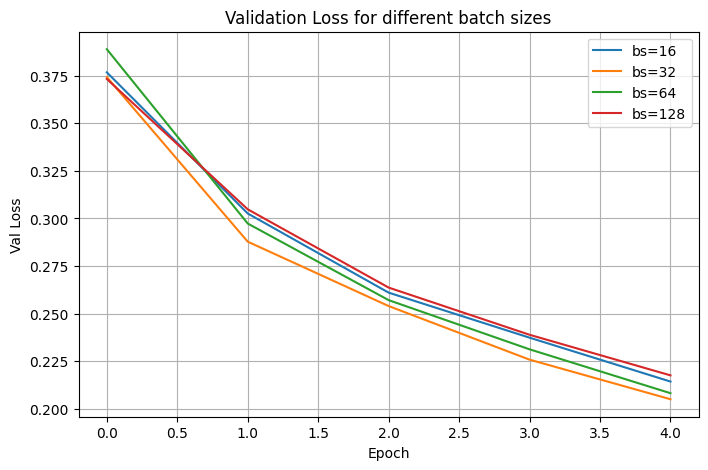

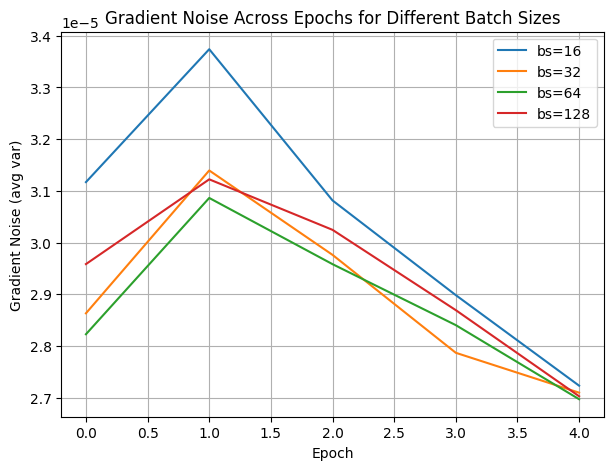

In [6]:
batch_sizes = [16, 32, 64, 128]
num_epochs = 5
results_bs = []
try:
    X_train_flat
    recreate_loaders = True
except NameError:
    recreate_loaders = False
for bs in batch_sizes:
    print(f"\n=== Batch size = {bs} ===")
    if recreate_loaders:
        multi_data = MNISTDataLoader(batch_size=bs, binary=False)
        train_loader_bs, val_loader_bs,_ = multi_data.get_loaders()
    else:
        train_loader_bs = train_loader; val_loader_bs = val_loader
    model = CustomFeedforwardNN()
    start = time.time()

    tl, vl, ta, va, grad_noise = train_model_once(
    model, train_loader_bs, val_loader_bs, epochs=num_epochs, learning_rate=0.01,grad_noise=True
)
    duration = time.time() - start
    results_bs.append({'bs': bs,'train_losses': tl,'val_losses': vl,'train_acc': ta,'val_acc': va,'grad_noise': grad_noise,'time_s': duration})


plt.figure(figsize=(8,5))
for res in results_bs:
    plt.plot(res['val_losses'], label=f"bs={res['bs']}")
plt.xlabel('Epoch'); plt.ylabel('Val Loss'); plt.title('Validation Loss for different batch sizes'); plt.legend(); plt.grid(True); plt.show()

pd.DataFrame([{'batch_size': r['bs'], 'final_val_acc': r['val_acc'][-1], 'time_s': r['time_s']} for r in results_bs])
# plotting the gradient noise
plt.figure(figsize=(7,5))
for r in results_bs:
    noise_values = [x['noise'] for x in r['grad_noise']]
    plt.plot(noise_values, label=f"bs={r['bs']}")
plt.xlabel("Epoch")
plt.ylabel("Gradient Noise (avg var)")
plt.title("Gradient Noise Across Epochs for Different Batch Sizes")
plt.legend()
plt.grid(True)
plt.show()


### C1.3 Architecture Analysis


Function to make fully connected NN based on number of hidden layers

In [7]:
def make_ffnn(hidden_sizes):
    # hidden_sizes: list of ints
    if len(hidden_sizes) == 1:
        return CustomFeedforwardNN(input_size=784, hidden1_size=hidden_sizes[0], hidden2_size=64, output_size=10)
    elif len(hidden_sizes) == 2:
        return CustomFeedforwardNN(input_size=784, hidden1_size=hidden_sizes[0], hidden2_size=hidden_sizes[1], output_size=10)
    else:
        # for >2 layers create dynamic module
        return FFN_dynamic(input_dim=784, hidden_sizes=hidden_sizes, output_dim=10)

In [8]:
layers_options = [ [64,64], [128,64], [256,128,64], [512,256,128,64] ]
results_arch = []
for hidden in layers_options:
    print(f"\n=== Arch: {hidden} ===")
    model = make_ffnn(hidden)
    tl, vl, ta, va,_ = train_model_once(model, train_loader, val_loader, epochs=5, learning_rate=0.01)
    results_arch.append({'hidden': hidden, 'train_acc': ta[-1], 'val_acc': va[-1], 'train_losses': tl, 'val_losses': vl})

pd.DataFrame([{'architecture': str(r['hidden']), 'train_acc': r['train_acc'], 'val_acc': r['val_acc']} for r in results_arch])



=== Arch: [64, 64] ===
Epoch 1/5 Train Loss: 0.8217 Train Acc: 0.7790 Val Loss: 0.3839 Val Acc: 0.8931
Epoch 2/5 Train Loss: 0.3384 Train Acc: 0.9044 Val Loss: 0.3103 Val Acc: 0.9101
Epoch 3/5 Train Loss: 0.2821 Train Acc: 0.9192 Val Loss: 0.2722 Val Acc: 0.9237
Epoch 4/5 Train Loss: 0.2498 Train Acc: 0.9286 Val Loss: 0.2472 Val Acc: 0.9302
Epoch 5/5 Train Loss: 0.2267 Train Acc: 0.9352 Val Loss: 0.2219 Val Acc: 0.9386

=== Arch: [128, 64] ===
Epoch 1/5 Train Loss: 0.7689 Train Acc: 0.7921 Val Loss: 0.3887 Val Acc: 0.8919
Epoch 2/5 Train Loss: 0.3316 Train Acc: 0.9052 Val Loss: 0.3029 Val Acc: 0.9154
Epoch 3/5 Train Loss: 0.2779 Train Acc: 0.9194 Val Loss: 0.2649 Val Acc: 0.9254
Epoch 4/5 Train Loss: 0.2453 Train Acc: 0.9287 Val Loss: 0.2410 Val Acc: 0.9320
Epoch 5/5 Train Loss: 0.2195 Train Acc: 0.9370 Val Loss: 0.2204 Val Acc: 0.9362

=== Arch: [256, 128, 64] ===
Epoch 1/5 Train Loss: 0.7378 Train Acc: 0.8006 Val Loss: 0.3352 Val Acc: 0.9042
Epoch 2/5 Train Loss: 0.2910 Train Acc: 0

,architecture,train_acc,val_acc
0,"[64, 64]",0.935214,0.938643
1,"[128, 64]",0.937048,0.936214
2,"[256, 128, 64]",0.951524,0.950071
3,"[512, 256, 128, 64]",0.961738,0.955500


## C2 — Model Comparison


Function to evaluate on test data

In [9]:
def evaluate_nn_on_loader(model, loader):
    model.to(device); model.eval()
    correct = 0; total = 0
    y_true = []
    y_pred = []
    with torch.no_grad():
        for X_batch, y_batch in loader:
            X_batch = X_batch.to(device)
            outputs = model(X_batch)
            _, preds = torch.max(outputs, 1)
            y_true.extend(y_batch.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())
            correct += (preds.cpu() == y_batch).sum().item()
            total += y_batch.size(0)
    return correct/total, np.array(y_true), np.array(y_pred)

In [11]:
# Logistic Regression (Binary)
print("Binary Logisitic Training")
log_model = LogisticRegression(input_dim=784, learning_rate=0.01, max_epochs=50,patience=5)
start_log = time.time()
log_model.fit(train_loader_bin, val_loader_bin)
log_time = time.time() - start_log


# Softmax Regression (multiclass)
print("Softmax Training")
soft_model = SoftmaxRegression(input_dim=784, num_classes=10, learning_rate=0.01,max_epochs=50,patience=5)
start_soft=time.time()
soft_model.fit(train_loader, val_loader)
soft_time = time.time() - start_soft

# Neural network
print("NN Training")
best_hidden = results_arch[3]['hidden'] if len(results_arch)>1 else [128,64]
best_model = make_ffnn(best_hidden)
start = time.time()
tl, vl, ta, va, _ = train_model_once(best_model, train_loader, val_loader, epochs=30, learning_rate=0.01)
nn_time = time.time() - start

# Evaluate Logistic on test
_,_,log_test_loss, log_test_acc = log_model.evaluate_test(binary_data.X_test, binary_data.y_test)
print('Logistic test acc:', log_test_acc)


# Evaluate Softmax on test
_,_,soft_test_loss, soft_test_acc = soft_model.evaluate_test(multi_data.X_test,multi_data.y_test)
print('Softmax test acc:', soft_test_acc)

# Evaluate NN on test
nn_test_acc, y_true_nn, y_pred_nn = evaluate_nn_on_loader(best_model, test_loader)
print('NN test acc:', nn_test_acc)

if torch.is_tensor(log_test_acc) and log_test_acc.numel() > 1:
    log_test_acc = (log_test_acc.mean()).item()
elif torch.is_tensor(log_test_acc):
    log_test_acc = log_test_acc.item()

# Summary table
comparison = pd.DataFrame([
    {'Model': 'Logistic Regression', 'Test Accuracy': float(log_test_acc), 'Training Time': log_time},
    {'Model': 'Softmax Regression', 'Test Accuracy': float(soft_test_acc), 'Training Time': soft_time},
    {'Model': f'Neural Network {best_hidden}', 'Test Accuracy': float(nn_test_acc), 'Training Time': nn_time}
])
comparison

Binary Logisitic Training
Epoch 10/50 - Train Loss: 0.0117, Train Acc: 0.9985 - Val Loss: 0.0126, Val Acc: 0.9970
Epoch 20/50 - Train Loss: 0.0078, Train Acc: 0.9985 - Val Loss: 0.0093, Val Acc: 0.9970
Epoch 30/50 - Train Loss: 0.0064, Train Acc: 0.9988 - Val Loss: 0.0081, Val Acc: 0.9970
Epoch 40/50 - Train Loss: 0.0054, Train Acc: 0.9988 - Val Loss: 0.0074, Val Acc: 0.9976
Epoch 50/50 - Train Loss: 0.0058, Train Acc: 0.9980 - Val Loss: 0.0071, Val Acc: 0.9980
Softmax Training
Epoch 10/50 - Train Loss: 0.3330, Train Acc: 0.9077 - Val Loss: 0.3334, Val Acc: 0.9094
Epoch 20/50 - Train Loss: 0.3016, Train Acc: 0.9161 - Val Loss: 0.3078, Val Acc: 0.9147
Epoch 30/50 - Train Loss: 0.2875, Train Acc: 0.9200 - Val Loss: 0.2966, Val Acc: 0.9192
Epoch 40/50 - Train Loss: 0.2790, Train Acc: 0.9222 - Val Loss: 0.2909, Val Acc: 0.9206
Epoch 50/50 - Train Loss: 0.2728, Train Acc: 0.9242 - Val Loss: 0.2875, Val Acc: 0.9220

Restored best model (Val Loss = 0.2873)
NN Training
Epoch 1/30 Train Loss: 0

,Model,Test Accuracy,Training Time
0,Logistic Regression,0.997632,12.889966
1,Softmax Regression,0.917357,69.594504
2,"Neural Network [512, 256, 128, 64]",0.977357,162.513247


Conclusion:

Logistic Regression, Softmax Regression, and Neural Networks differ in both their computational complexity and their ability to capture relationships in data.

1. Logistic Regression is best suited for binary classification tasks.When data is linearly separable ,logistic regression offers a transparent view of how input features influence predictions. However, it cannot handle multiple classes directly without a one-vs-rest setup, and it fails to capture non-linear relationships.

2. Softmax Regression, also known as multinomial logistic regression, acts as an extension for logistic regression to multiclass problems. It maintains efficiency and interpretability while handling multiple output categories. Despite its simplicity, it struggles when the decision boundaries between classes are highly non-linear or complex.

3. Neural Networks (Feedforward Models) represent a powerful generalization that can capture complex, non-linear patterns. By stacking multiple layers, they learn abstract representations of data and can achieve way better accuracy But, they come at the cost of higher computational requirements, longer training time. and they require careful tuning of hyperparameters (learning rate, number of layers, neurons) to achieve stable convergence.

In summary, Logistic Regression and Softmax Regression serve as efficient and interpretable models for linear relationships. Neural Networks, as they're more complex,making them more suitable for large-scale or highly non-linear tasks. The choice of model depends on the problem complexity, dataset size and other parameters.

## C2.1 Confusion Matrix & Misclassified Examples (Best NN)


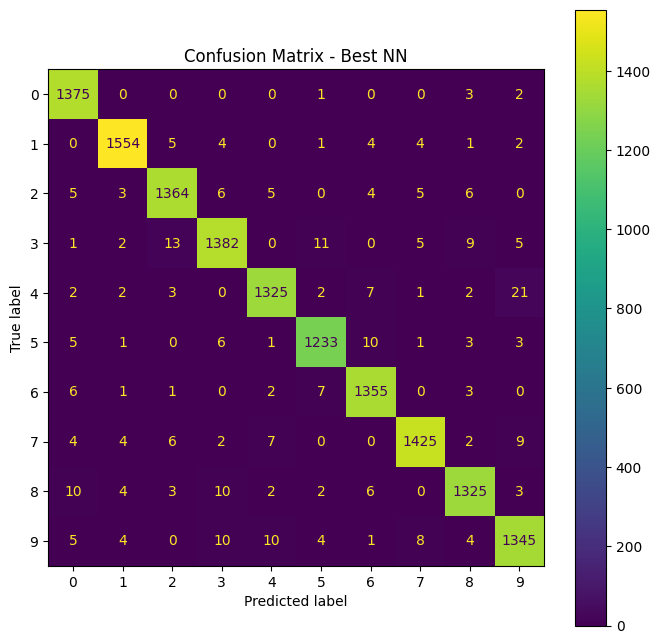

Total misclassified: 317


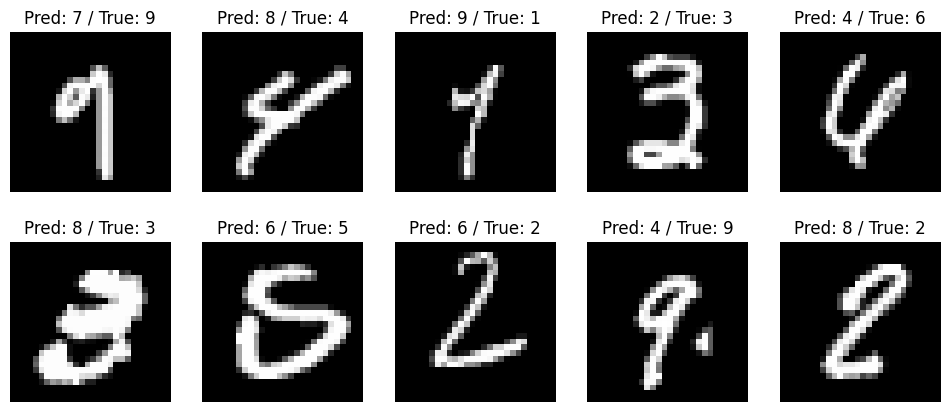

In [12]:
cm = confusion_matrix(y_true_nn, y_pred_nn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(8,8))
disp.plot(ax=ax)
plt.title('Confusion Matrix - Best NN')
plt.show()

# Show some misclassified examples
mis_idx = np.where(y_true_nn != y_pred_nn)[0]
print('Total misclassified:', len(mis_idx))


dataset_for_vis = test_loader.dataset
fig, axes = plt.subplots(2,5, figsize=(12,5))
for i, ax in enumerate(axes.flat):
    if i >= len(mis_idx): break
    idx = mis_idx[i]
    # if dataset stores flattened images, reshape
    img_flat, true_label = dataset_for_vis[idx]
    if img_flat.ndim == 1:
        img = img_flat.reshape(28,28)
    else:
        img = img_flat.squeeze()
    ax.imshow(img, cmap='gray')
    ax.set_title(f"Pred: {y_pred_nn[idx]} / True: {y_true_nn[idx]}")
    ax.axis('off')
plt.show()

## C3 — Final Evaluation & Retraining Best Model on Train+Val


In [13]:
# Combine train + val into one dataset and retrain best model
final_model = make_ffnn(best_hidden)
# train
train_model_once(final_model, train_loader, test_loader, epochs=30, learning_rate=0.01)
final_acc, y_true_final, y_pred_final = evaluate_nn_on_loader(final_model, test_loader)
print('Final test acc after retraining on train+val:', final_acc)

Epoch 1/30 Train Loss: 0.7136 Train Acc: 0.8061 Val Loss: 0.3201 Val Acc: 0.9060
Epoch 2/30 Train Loss: 0.2626 Train Acc: 0.9229 Val Loss: 0.2294 Val Acc: 0.9308
Epoch 3/30 Train Loss: 0.1993 Train Acc: 0.9418 Val Loss: 0.1851 Val Acc: 0.9446
Epoch 4/30 Train Loss: 0.1600 Train Acc: 0.9538 Val Loss: 0.1590 Val Acc: 0.9531
Epoch 5/30 Train Loss: 0.1319 Train Acc: 0.9616 Val Loss: 0.1530 Val Acc: 0.9561
Epoch 6/30 Train Loss: 0.1112 Train Acc: 0.9675 Val Loss: 0.1334 Val Acc: 0.9614
Epoch 7/30 Train Loss: 0.0950 Train Acc: 0.9731 Val Loss: 0.1198 Val Acc: 0.9643
Epoch 8/30 Train Loss: 0.0818 Train Acc: 0.9766 Val Loss: 0.1113 Val Acc: 0.9662
Epoch 9/30 Train Loss: 0.0705 Train Acc: 0.9800 Val Loss: 0.1110 Val Acc: 0.9670
Epoch 10/30 Train Loss: 0.0604 Train Acc: 0.9823 Val Loss: 0.0996 Val Acc: 0.9699
Epoch 11/30 Train Loss: 0.0517 Train Acc: 0.9856 Val Loss: 0.1062 Val Acc: 0.9681
Epoch 12/30 Train Loss: 0.0450 Train Acc: 0.9876 Val Loss: 0.0925 Val Acc: 0.9722
Epoch 13/30 Train Loss: 0